In [50]:
import pandas as pd
import numpy as np
import re
%pip install matplotlib
from matplotlib import pyplot as plt
import datetime as dt
from datetime import datetime
%pip install scipy
from scipy.stats import linregress

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [51]:
def parse_date(date):
    return datetime.strptime(date, '%Y-%m-%d %H:%M:%S')

def parse_many_dates(dates):
    return map(parse_date, dates)
dog_rates = pd.read_csv("dog_rates_tweets.csv", parse_dates=[1])


In [52]:

def extract_rating(tweet):
    """
    Args:
        tweet: a string that optionally contains a rating of the form x/10, where x is a positive integer

    Returns: NAN if the tweet has no rating, otherwise returns the numerical value of the rating
    """

    def process_rating(rating):
        num, _ = map(float, rating.split('/'))
        return num

    match = re.search(r'(\d+(\.\d+)?)/10', tweet)
    return np.nan if not match else process_rating(match.group())



In [67]:
def dates_and_ratings_of_tweets(tweets):
    """
    Args:
        tweets: a DataFrame where each row contains the date a tweet was sent, the user who made
        the tweet, and the content of the tweet

    Returns: a DataFrame where each row has a date and rating of a tweet which
    contains a rating of the form x/10, where x is in [0, 24]
    """
    def validate_ratings(rating):
        return np.nan if rating > 25 else rating

    def remove_invalid_ratings(tweet_coll):
        tweets_cpy = tweet_coll.copy()
        tweets_cpy['rating'] = tweets_cpy['rating'].map(validate_ratings)
        return tweets_cpy.dropna()[['rating', 'created_at']]

    tweets_with_ratings = tweets.assign(rating=tweets['text'].apply(extract_rating))
    return remove_invalid_ratings(tweets_with_ratings)


In [69]:
tweets_with_valid_ratings = dates_and_ratings_of_tweets(dog_rates)

In [70]:
ratings = tweets_with_valid_ratings['rating']
dates = tweets_with_valid_ratings['created_at']
tweets_with_valid_ratings

,rating,created_at
2,14.0,2018-05-09 23:48:56
7,13.0,2018-05-08 16:23:07
8,14.0,2018-05-07 23:11:58
24,13.0,2018-05-04 00:25:48
30,13.0,2018-05-02 18:19:39
...,...,...
7363,14.0,2018-08-23 20:25:53
7369,14.0,2018-08-22 16:55:26
7381,13.0,2018-08-21 00:16:09
7431,14.0,2018-08-15 16:30:55


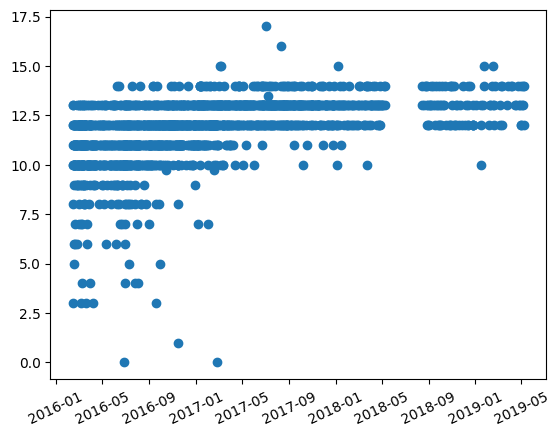

In [71]:
plt.xticks(rotation=25)
plt.plot(dates, ratings, 'o')

In [78]:
to_seconds = lambda x: x.timestamp()
dates_in_seconds = dates.apply(to_seconds)
regress_info = linregress(dates_in_seconds, ratings)
slope = regress_info.slope

In [79]:
intercept = regress_info.intercept

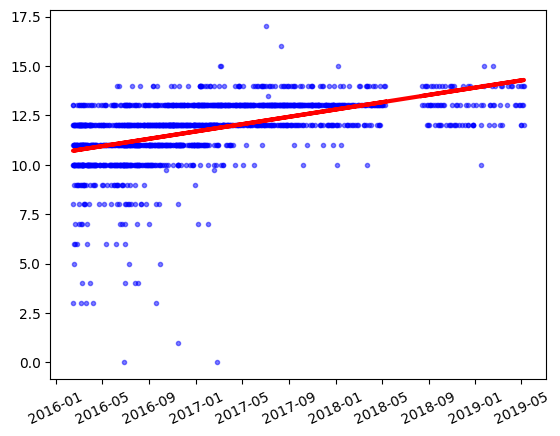

In [84]:

plt.xticks(rotation=25)
plt.plot(dates, ratings, 'b.', alpha=0.5)
plt.plot(dates, dates_in_seconds * slope + intercept, 'r-', linewidth=3)
plt.show()